In [123]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [124]:
ranking = pd.read_csv("fifa_ranking.csv")
ranking  = ranking.rename(columns={"rank":"Rank"})
ranking.head()

,Rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date
0,1,Germany,GER,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
1,2,Italy,ITA,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
2,3,Switzerland,SUI,0.0,50,9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
3,4,Sweden,SWE,0.0,55,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
4,5,Argentina,ARG,0.0,51,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08


In [125]:
ranking.describe()

,Rank,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted
count,57793.000000,57793.000000,57793.000000,57793.000000,57793.000000,57793.000000,57793.000000,57793.000000,57793.000000,57793.000000,57793.000000,57793.000000
mean,101.628086,122.068637,332.302926,-0.009897,61.798602,61.798602,61.004602,30.502377,59.777462,17.933277,59.173916,11.834811
std,58.618424,260.426863,302.872948,5.804309,138.014883,138.014883,137.688204,68.844143,136.296079,40.888849,135.533343,27.106675
min,1.000000,0.000000,0.000000,-72.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,51.000000,0.000000,56.000000,-2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,101.000000,0.000000,272.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,152.000000,92.790000,525.000000,1.000000,32.250000,32.250000,26.660000,13.330000,21.500000,6.450000,21.250000,4.250000
max,209.000000,1775.030000,1920.000000,92.000000,1158.660000,1158.660000,1169.570000,584.790000,1159.710000,347.910000,1200.770000,240.150000


In [126]:
ranking.columns

Index(['Rank', 'country_full', 'country_abrv', 'total_points',
       'previous_points', 'rank_change', 'cur_year_avg',
       'cur_year_avg_weighted', 'last_year_avg', 'last_year_avg_weighted',
       'two_year_ago_avg', 'two_year_ago_weighted', 'three_year_ago_avg',
       'three_year_ago_weighted', 'confederation', 'rank_date'],
      dtype='object')

In [127]:
np.sort(ranking.country_full.unique())

array(['Afghanistan', 'Albania', 'Algeria', 'American Samoa', 'Andorra',
       'Angola', 'Anguilla', 'Antigua and Barbuda', 'Argentina',
       'Armenia', 'Aruba', 'Australia', 'Austria', 'Azerbaijan',
       'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus',
       'Belgium', 'Belize', 'Benin', 'Bermuda', 'Bhutan', 'Bolivia',
       'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'British Virgin Islands', 'Brunei Darussalam', 'Bulgaria',
       'Burkina Faso', 'Burundi', 'Cambodia', 'Cameroon', 'Canada',
       'Cape Verde Islands', 'Cayman Islands', 'Central African Republic',
       'Chad', 'Chile', 'China PR', 'Chinese Taipei', 'Colombia',
       'Comoros', 'Congo', 'Congo DR', 'Cook Islands', 'Costa Rica',
       'Croatia', 'Cuba', 'Curaçao', 'Cyprus', 'Czech Republic',
       "Côte d'Ivoire", 'Denmark', 'Djibouti', 'Dominica',
       'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador', 'England',
       'Equatorial Guinea', 'Eritrea', 'Estonia', 'Ethiopia',
  

In [128]:
# timeline between 2014 t0 2018
ranking = ranking[ranking.rank_date.str.startswith(( '2014', '2015', '2016', '2017', '2018'))]

In [129]:
# multiple rank dates with in same year
ranking[ranking.rank_date.str.startswith("2018")].rank_date.value_counts()


2018-01-18    211
2018-02-15    211
2018-03-15    211
2018-04-12    211
2018-05-17    211
2018-06-07    211
Name: rank_date, dtype: int64

In [130]:
# select values from latest in each year
latest_dates = []
for year in ['2014', '2015', '2016', '2017', '2018']:
    latest_dates.append(max(ranking[ranking.rank_date.str.startswith(year)].rank_date))
latest_dates

['2014-12-18', '2015-12-03', '2016-12-22', '2017-12-21', '2018-06-07']

In [131]:
ranking.describe()

,Rank,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted
count,11344.000000,11344.000000,11344.000000,11344.000000,11344.000000,11344.000000,11344.000000,11344.000000,11344.000000,11344.000000,11344.000000,11344.000000
mean,105.271597,409.144705,409.058004,-0.001499,205.384735,205.384735,205.316009,102.658251,204.131045,61.239388,199.314642,39.862978
std,60.412924,340.041791,339.922589,6.809384,190.605311,190.605311,188.659725,94.329737,182.786859,54.836066,183.952708,36.790498
min,1.000000,0.000000,0.000000,-62.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,53.000000,142.785000,143.000000,-2.000000,59.500000,59.500000,63.750000,31.880000,64.437500,19.332500,58.362500,11.670000
50%,105.000000,319.680000,320.000000,0.000000,155.110000,155.110000,157.330000,78.670000,160.085000,48.025000,153.080000,30.620000
75%,158.000000,596.810000,597.000000,1.000000,305.210000,305.210000,299.250000,149.630000,294.820000,88.450000,293.682500,58.735000
max,209.000000,1775.030000,1775.000000,82.000000,1158.660000,1158.660000,1169.570000,584.790000,1158.660000,347.600000,1200.770000,240.150000


In [132]:
ranking[ranking.rank_change == max(ranking.rank_change)]

,Rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date
48653,105,Faroe Islands,FRO,317.21,42,82,270.27,270.27,18.89,9.44,0.0,0.0,187.5,37.5,UEFA,2014-11-27


In [133]:
ranking = ranking[ranking.rank_date.isin(latest_dates)]
ranking.shape

(1052, 16)

In [134]:
ranking.head()

,Rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date
48759,1,Germany,GER,1725.29,1725,0,1090.54,1090.54,566.83,283.42,765.86,229.76,607.88,121.58,UEFA,2014-12-18
48760,2,Argentina,ARG,1538.29,1538,0,937.59,937.59,590.90,295.45,733.76,220.13,425.62,85.12,CONMEBOL,2014-12-18
48761,3,Colombia,COL,1449.77,1450,0,805.97,805.97,632.31,316.15,794.27,238.28,446.83,89.37,CONMEBOL,2014-12-18
48762,4,Belgium,BEL,1417.27,1417,0,849.03,849.03,652.93,326.46,542.17,162.65,395.59,79.12,UEFA,2014-12-18
48763,5,Netherlands,NED,1374.24,1374,0,884.29,884.29,527.71,263.86,428.54,128.56,487.68,97.54,UEFA,2014-12-18


In [135]:
# So take the year, later adjust for selection 
ranking["year"] = ranking.rank_date.str.slice(0,4)
ranking.head()

,Rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date,year
48759,1,Germany,GER,1725.29,1725,0,1090.54,1090.54,566.83,283.42,765.86,229.76,607.88,121.58,UEFA,2014-12-18,2014
48760,2,Argentina,ARG,1538.29,1538,0,937.59,937.59,590.90,295.45,733.76,220.13,425.62,85.12,CONMEBOL,2014-12-18,2014
48761,3,Colombia,COL,1449.77,1450,0,805.97,805.97,632.31,316.15,794.27,238.28,446.83,89.37,CONMEBOL,2014-12-18,2014
48762,4,Belgium,BEL,1417.27,1417,0,849.03,849.03,652.93,326.46,542.17,162.65,395.59,79.12,UEFA,2014-12-18,2014
48763,5,Netherlands,NED,1374.24,1374,0,884.29,884.29,527.71,263.86,428.54,128.56,487.68,97.54,UEFA,2014-12-18,2014


In [136]:
# countries who held the top position
ranking[ranking.Rank==1].country_full.unique()

array(['Germany', 'Belgium', 'Argentina'], dtype=object)

In [137]:
#time line
ranking.rank_date.unique()

array(['2014-12-18', '2015-12-03', '2016-12-22', '2017-12-21',
       '2018-06-07'], dtype=object)

In [141]:
gdp_growth = pd.read_csv("Global Nations Economy -GDP Growth.csv")
gdp_per_capita = pd.read_csv("Global Nations Economy -GDP Per Capita.csv")
gdp_val = pd.read_csv("Global Nations Economy -GDP.csv")
gdp_population = pd.read_csv("Global Nations Economy -Population.csv")

In [142]:
gdp_per_capita.head()

,Country Name,2018,2017,2016,2015,2014
0,Monaco,"$185,979","$167,517","$170,029","$165,990","$189,432"
1,Liechtenstein,"$180,367","$171,254","$165,642","$167,313","$178,865"
2,Luxembourg,"$116,654","$107,627","$104,349","$101,417","$118,982"
3,Bermuda,"$113,023","$111,821","$106,886","$102,006","$98,468"
4,Isle Of Man,"$89,113","$83,478","$82,197","$85,127","$92,335"


In [143]:
gdp_per_capita = gdp_per_capita.melt(id_vars="Country Name", value_vars=gdp_per_capita.columns[1:],var_name="year",value_name="gdp_per_capita")
gdp_per_capita.rename(columns={"Country Name": "country"},inplace=True)
gdp_per_capita.shape

(1035, 3)

In [144]:
gdp_per_capita.head()

,country,year,gdp_per_capita
0,Monaco,2018,"$185,979"
1,Liechtenstein,2018,"$180,367"
2,Luxembourg,2018,"$116,654"
3,Bermuda,2018,"$113,023"
4,Isle Of Man,2018,"$89,113"


In [145]:
gdp_per_capita.year.unique()

array(['2018', '2017', '2016', '2015', '2014'], dtype=object)

In [23]:
gdp_per_capita.country.unique().size

207

In [24]:
ranking.country_full.unique().size

211

In [25]:
# china vs china taipei

In [26]:
from nltk.metrics.distance import jaccard_distance
from nltk.util import ngrams
from nltk.metrics.distance  import edit_distance

In [27]:
# replace similar countries using text similarity
import textdistance
count=0
first = set(gdp_per_capita.country.unique())
to_change =[]
for w in ranking.country_full.unique():
    for z in gdp_per_capita.country.unique():
        if(w==z):
            continue
        else:
            if(jaccard_distance(set(ngrams(w, 2)), set(ngrams(z, 2)))<0.5):
                print("replace " + z + " by " + w)
            # print(w,z)

replace Australia by Austria
replace Niger by Nigeria
replace Gambia by Zambia
replace Trinidad And Tobago by Trinidad and Tobago
replace Antigua And Barbuda by Antigua and Barbuda
replace China by China PR
replace North Macedonia by FYR Macedonia
replace Austria by Australia
replace Nigeria by Niger
replace St. Kitts And Nevis by St Kitts and Nevis
replace St. Vincent And The Grenadines by St Vincent and the Grenadines
replace St. Lucia by St Lucia
replace Zambia by Gambia
replace Turks And Caicos Islands by Turks and Caicos Islands
replace Macao by Macau
replace Virgin Islands (U.S.) by US Virgin Islands


In [28]:
# for the names that are not similar, rename the equivalent of the following names
l = []
count=0
first = set(gdp_per_capita.country.unique())
for w in ranking.country_full.unique():
    if(w in first):
        continue
    l.append(w)
    count+=1
print(sorted(l))

['Anguilla', 'Antigua and Barbuda', 'Bosnia and Herzegovina', 'British Virgin Islands', 'Brunei Darussalam', 'Cape Verde Islands', 'China PR', 'Chinese Taipei', 'Congo', 'Congo DR', 'Cook Islands', 'Curaçao', "Côte d'Ivoire", 'England', 'Eritrea', 'FYR Macedonia', 'Gibraltar', 'IR Iran', 'Korea DPR', 'Korea Republic', 'Laos', 'Macau', 'Montserrat', 'New Caledonia', 'Northern Ireland', 'Palestine', 'Republic of Ireland', 'Scotland', 'Slovakia', 'St Kitts and Nevis', 'St Lucia', 'St Vincent and the Grenadines', 'Swaziland', 'Syria', 'São Tomé e Príncipe', 'Tahiti', 'Trinidad and Tobago', 'Turks and Caicos Islands', 'US Virgin Islands', 'USA', 'United Arab Emirates', 'Wales']


In [29]:
# print(sorted(first))

In [146]:
gdp_per_capita.country.replace({"St. Kitts And Nevis": "St Kitts and Nevis",
                                "Turks And Caicos Islands":"Turks and Caicos Islands",
                                "St. Lucia": "St Lucia",
                                "Trinidad And Tobago" : "Trinidad and Tobago",
                                "St. Vincent And The Grenadines":"St Vincent and the Grenadines",
                                "Macao": "Macau",
                                "North Macedonia":"FYR Macedonia",
                                "Virgin Islands (U.S.)": "US Virgin Islands",
                                "Antigua And Barbuda" : "Antigua and Barbuda",
                                "China":"China PR",
                                'Ireland':'Republic of Ireland',
                                'United Kingdom': 'England',
                                'Brunei':'Brunei Darussalam',
                                'Cabo Verde':'Cape Verde Islands',
                                'China' : "China PR",
                                'Congo, Dem. Rep.': "Congo DR",
                                'Congo, Rep.': 'Congo',
                                'Curacao':'Curaçao',
                                'Iran' :'IR Iran',
                                'Lao PDR': 'Laos',
                                'United States': 'USA',
                                'UAE': 'United Arab Emirates'
                                },inplace=True)

In [29]:
ranking.shape, gdp_per_capita.shape

((1052, 17), (1035, 3))

In [30]:
ranking.country_full.unique().size,gdp_per_capita.country.unique().size

(211, 207)

In [31]:
gdp_per_capita.head()

,country,year,gdp_per_capita
0,Monaco,2018,"$185,979"
1,Liechtenstein,2018,"$180,367"
2,Luxembourg,2018,"$116,654"
3,Bermuda,2018,"$113,023"
4,Isle Of Man,2018,"$89,113"


In [153]:
merged = pd.merge(ranking,gdp_per_capita, how="left",left_on=["country_full","year"], right_on=["country","year"])
merged.drop(columns=["country_full"],inplace=True)
merged.dropna(inplace=True)


In [154]:
merged.head()

,Rank,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date,year,country,gdp_per_capita
0,1,GER,1725.29,1725,0,1090.54,1090.54,566.83,283.42,765.86,229.76,607.88,121.58,UEFA,2014-12-18,2014,Germany,"$48,024"
1,2,ARG,1538.29,1538,0,937.59,937.59,590.90,295.45,733.76,220.13,425.62,85.12,CONMEBOL,2014-12-18,2014,Argentina,"$12,335"
2,3,COL,1449.77,1450,0,805.97,805.97,632.31,316.15,794.27,238.28,446.83,89.37,CONMEBOL,2014-12-18,2014,Colombia,"$8,114"
3,4,BEL,1417.27,1417,0,849.03,849.03,652.93,326.46,542.17,162.65,395.59,79.12,UEFA,2014-12-18,2014,Belgium,"$47,764"
4,5,NED,1374.24,1374,0,884.29,884.29,527.71,263.86,428.54,128.56,487.68,97.54,UEFA,2014-12-18,2014,Netherlands,"$52,901"


In [155]:
# convert dollar currency to float
merged.gdp_per_capita=merged.gdp_per_capita.replace('[\$,]', '', regex=True).astype(float)

In [176]:
merged.head(20)

,Rank,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date,year,country,gdp_per_capita
0,1,GER,1725.29,1725,0,1090.54,1090.54,566.83,283.42,765.86,229.76,607.88,121.58,UEFA,2014-12-18,2014,Germany,48024.0
1,2,ARG,1538.29,1538,0,937.59,937.59,590.90,295.45,733.76,220.13,425.62,85.12,CONMEBOL,2014-12-18,2014,Argentina,12335.0
2,3,COL,1449.77,1450,0,805.97,805.97,632.31,316.15,794.27,238.28,446.83,89.37,CONMEBOL,2014-12-18,2014,Colombia,8114.0
3,4,BEL,1417.27,1417,0,849.03,849.03,652.93,326.46,542.17,162.65,395.59,79.12,UEFA,2014-12-18,2014,Belgium,47764.0
4,5,NED,1374.24,1374,0,884.29,884.29,527.71,263.86,428.54,128.56,487.68,97.54,UEFA,2014-12-18,2014,Netherlands,52901.0
5,6,BRA,1316.15,1316,0,796.05,796.05,668.33,334.16,341.21,102.36,417.86,83.57,CONMEBOL,2014-12-18,2014,Brazil,12113.0
6,7,POR,1160.22,1160,0,570.26,570.26,611.29,305.65,573.67,172.10,561.05,112.21,UEFA,2014-12-18,2014,Portugal,22104.0
7,7,FRA,1159.55,1160,0,700.29,700.29,435.22,217.61,481.29,144.39,486.32,97.26,UEFA,2014-12-18,2014,France,43069.0
8,9,ESP,1141.56,1142,0,420.42,420.42,699.69,349.84,830.72,249.22,610.39,122.08,UEFA,2014-12-18,2014,Spain,29501.0
9,10,URU,1135.08,1135,0,585.86,585.86,625.97,312.98,303.35,91.01,726.15,145.23,CONMEBOL,2014-12-18,2014,Uruguay,16832.0


In [170]:
merged.country.unique()

array(['Germany', 'Argentina', 'Colombia', 'Belgium', 'Netherlands',
       'Brazil', 'Portugal', 'France', 'Spain', 'Uruguay', 'Italy',
       'Switzerland', 'England', 'Chile', 'Romania', 'Costa Rica',
       'Czech Republic', 'Algeria', 'Croatia', 'Mexico', 'Tunisia',
       'Austria', 'Greece', 'Ukraine', 'Ecuador', 'USA', 'Denmark',
       'Russia', 'Israel', 'Iceland', 'Senegal', 'Ghana', 'Serbia',
       'Guinea', 'Cape Verde Islands', 'Poland', 'Cameroon', 'Nigeria',
       'Sweden', 'Hungary', 'Zambia', 'Slovenia', 'Turkey', 'Mali',
       'IR Iran', 'South Africa', 'Peru', 'Japan', 'Trinidad and Tobago',
       'Congo DR', 'Panama', 'Albania', 'Montenegro', 'Egypt', 'Congo',
       'Togo', 'Burkina Faso', 'Republic of Ireland', 'Gabon', 'Bulgaria',
       'Norway', 'Rwanda', 'Finland', 'Honduras', 'Guatemala', 'Haiti',
       'Uzbekistan', 'Jamaica', 'Uganda', 'Paraguay', 'Libya', 'Armenia',
       'Angola', 'Morocco', 'United Arab Emirates', 'Jordan', 'Estonia',
       'Boli

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


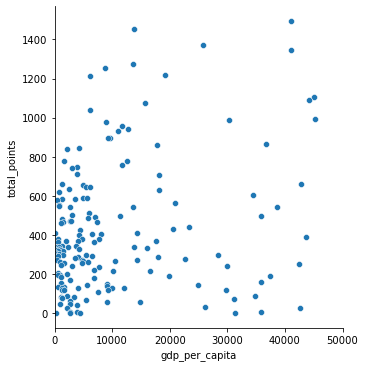

In [180]:
g = sns.relplot("gdp_per_capita","total_points",data = merged[merged.year=="2015"])
g.set(xlim=(0, 50000))


In [92]:
on_total= merged.groupby(["total_points"]).agg({"gdp_per_capita":"mean","country":"max"})
# sns.relplot("Rank","total_points",data=on_total)
on_total

,gdp_per_capita,country
total_points,,
0.00,11623.375,Turks and Caicos Islands
4.25,2679.000,Papua New Guinea
4.30,2464.000,Djibouti
5.28,74990.000,Cayman Islands
5.58,35771.000,Andorra
...,...,...
1544.05,8710.000,Brazil
1558.49,47811.000,Germany
1601.91,44553.000,Germany


C:\Users\Dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


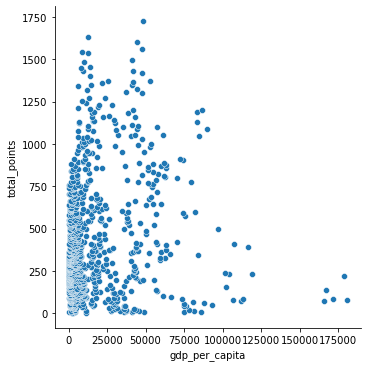

In [77]:
sns.relplot("gdp_per_capita","total_points",data=on_total)

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


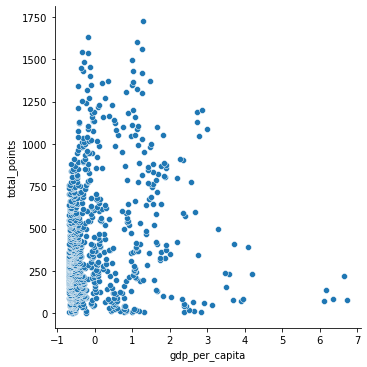

In [53]:
sns.relplot("gdp_per_capita","total_points",data=on_total.iloc[:,-1:].apply(lambda x: (x-x.mean())/ x.std(), axis=0))

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


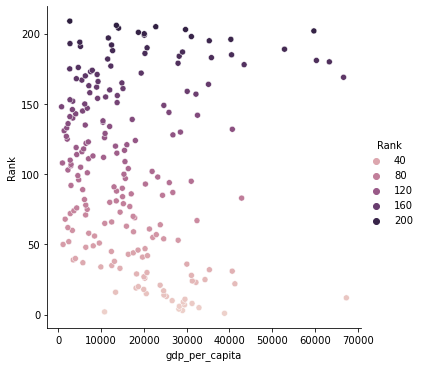

In [80]:
_ = merged[["Rank","gdp_per_capita"]].groupby(["Rank"]).mean()
sns.relplot("gdp_per_capita","Rank",data=_)

In [106]:
# plt.xlim((0,25000))
# sns.relplot("gdp_per_capita","total_points", data=on_total.reset_index(),hue="country")

(array([686., 104.,  87.,  35.,  20.,   8.,   4.,   0.,   0.,   5.]),
 array([     0. ,  18036.7,  36073.4,  54110.1,  72146.8,  90183.5,
        108220.2, 126256.9, 144293.6, 162330.3, 180367. ]),
 <BarContainer object of 10 artists>)

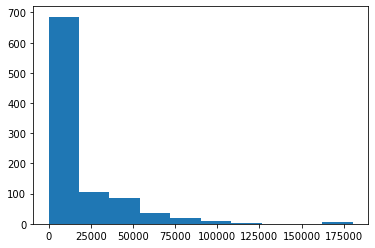

In [162]:
plt.hist(merged.gdp_per_capita)

<AxesSubplot:xlabel='gdp_per_capita', ylabel='Rank'>

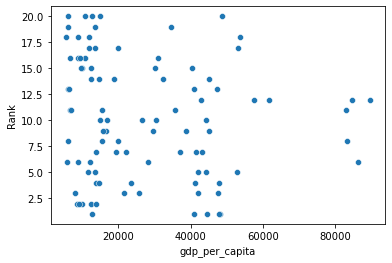

In [147]:
merged_top = merged[(merged.Rank>=1) &( merged.Rank<=20)]
sns.scatterplot(y="Rank",x="gdp_per_capita",data=merged_top)

In [127]:
merged.head()

,Rank,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date,country,gdp_per_capita
0,1,GER,1725.29,1725,0,1090.54,1090.54,566.83,283.42,765.86,229.76,607.88,121.58,UEFA,2014-12-18,Germany,48024.0
1,2,ARG,1538.29,1538,0,937.59,937.59,590.90,295.45,733.76,220.13,425.62,85.12,CONMEBOL,2014-12-18,Argentina,12335.0
2,3,COL,1449.77,1450,0,805.97,805.97,632.31,316.15,794.27,238.28,446.83,89.37,CONMEBOL,2014-12-18,Colombia,8114.0
3,4,BEL,1417.27,1417,0,849.03,849.03,652.93,326.46,542.17,162.65,395.59,79.12,UEFA,2014-12-18,Belgium,47764.0
4,5,NED,1374.24,1374,0,884.29,884.29,527.71,263.86,428.54,128.56,487.68,97.54,UEFA,2014-12-18,Netherlands,52901.0


In [119]:
_.tail(20)

,gdp_per_capita
Rank,
188,12662.000000
189,52867.250000
190,20723.200000
191,5147.000000
192,12418.666667
193,2696.000000
194,4993.000000
195,35271.400000
196,40319.000000
